--- Test nn with jupyter notebook ---
I want to make a neural network to determine if a student will graduate or not (meaning either dropout or continue studying)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import TensorDataset , DataLoader
import torch.nn as nn 
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback
from ucimlrepo import fetch_ucirepo 
from IPython.display import clear_output


Target
Dropout     1421
Enrolled     794
Graduate    2209
Name: count, dtype: int64
Target
0    2215
1    2209
Name: count, dtype: int64


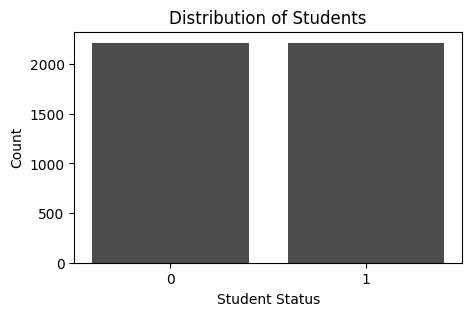

In [126]:
# Load the data file
students = fetch_ucirepo(id=697) 
X = students.data.features 
y = students.data.targets 
df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
class_count = df['Target'].value_counts().sort_index()
print(class_count)

mapping ={'Dropout': 0, 'Enrolled': 0, 'Graduate': 1}

df['Target'] = df['Target'].map(mapping)
class_count = df['Target'].value_counts().sort_index()
print(class_count)


plt.figure(figsize=(5, 3))
plt.bar(class_count.index.astype(str), class_count.values, color='black', alpha=0.7)
plt.title('Distribution of Students')
plt.xlabel('Student Status')
plt.ylabel('Count')
plt.savefig('student_distribution.png', dpi = 200)

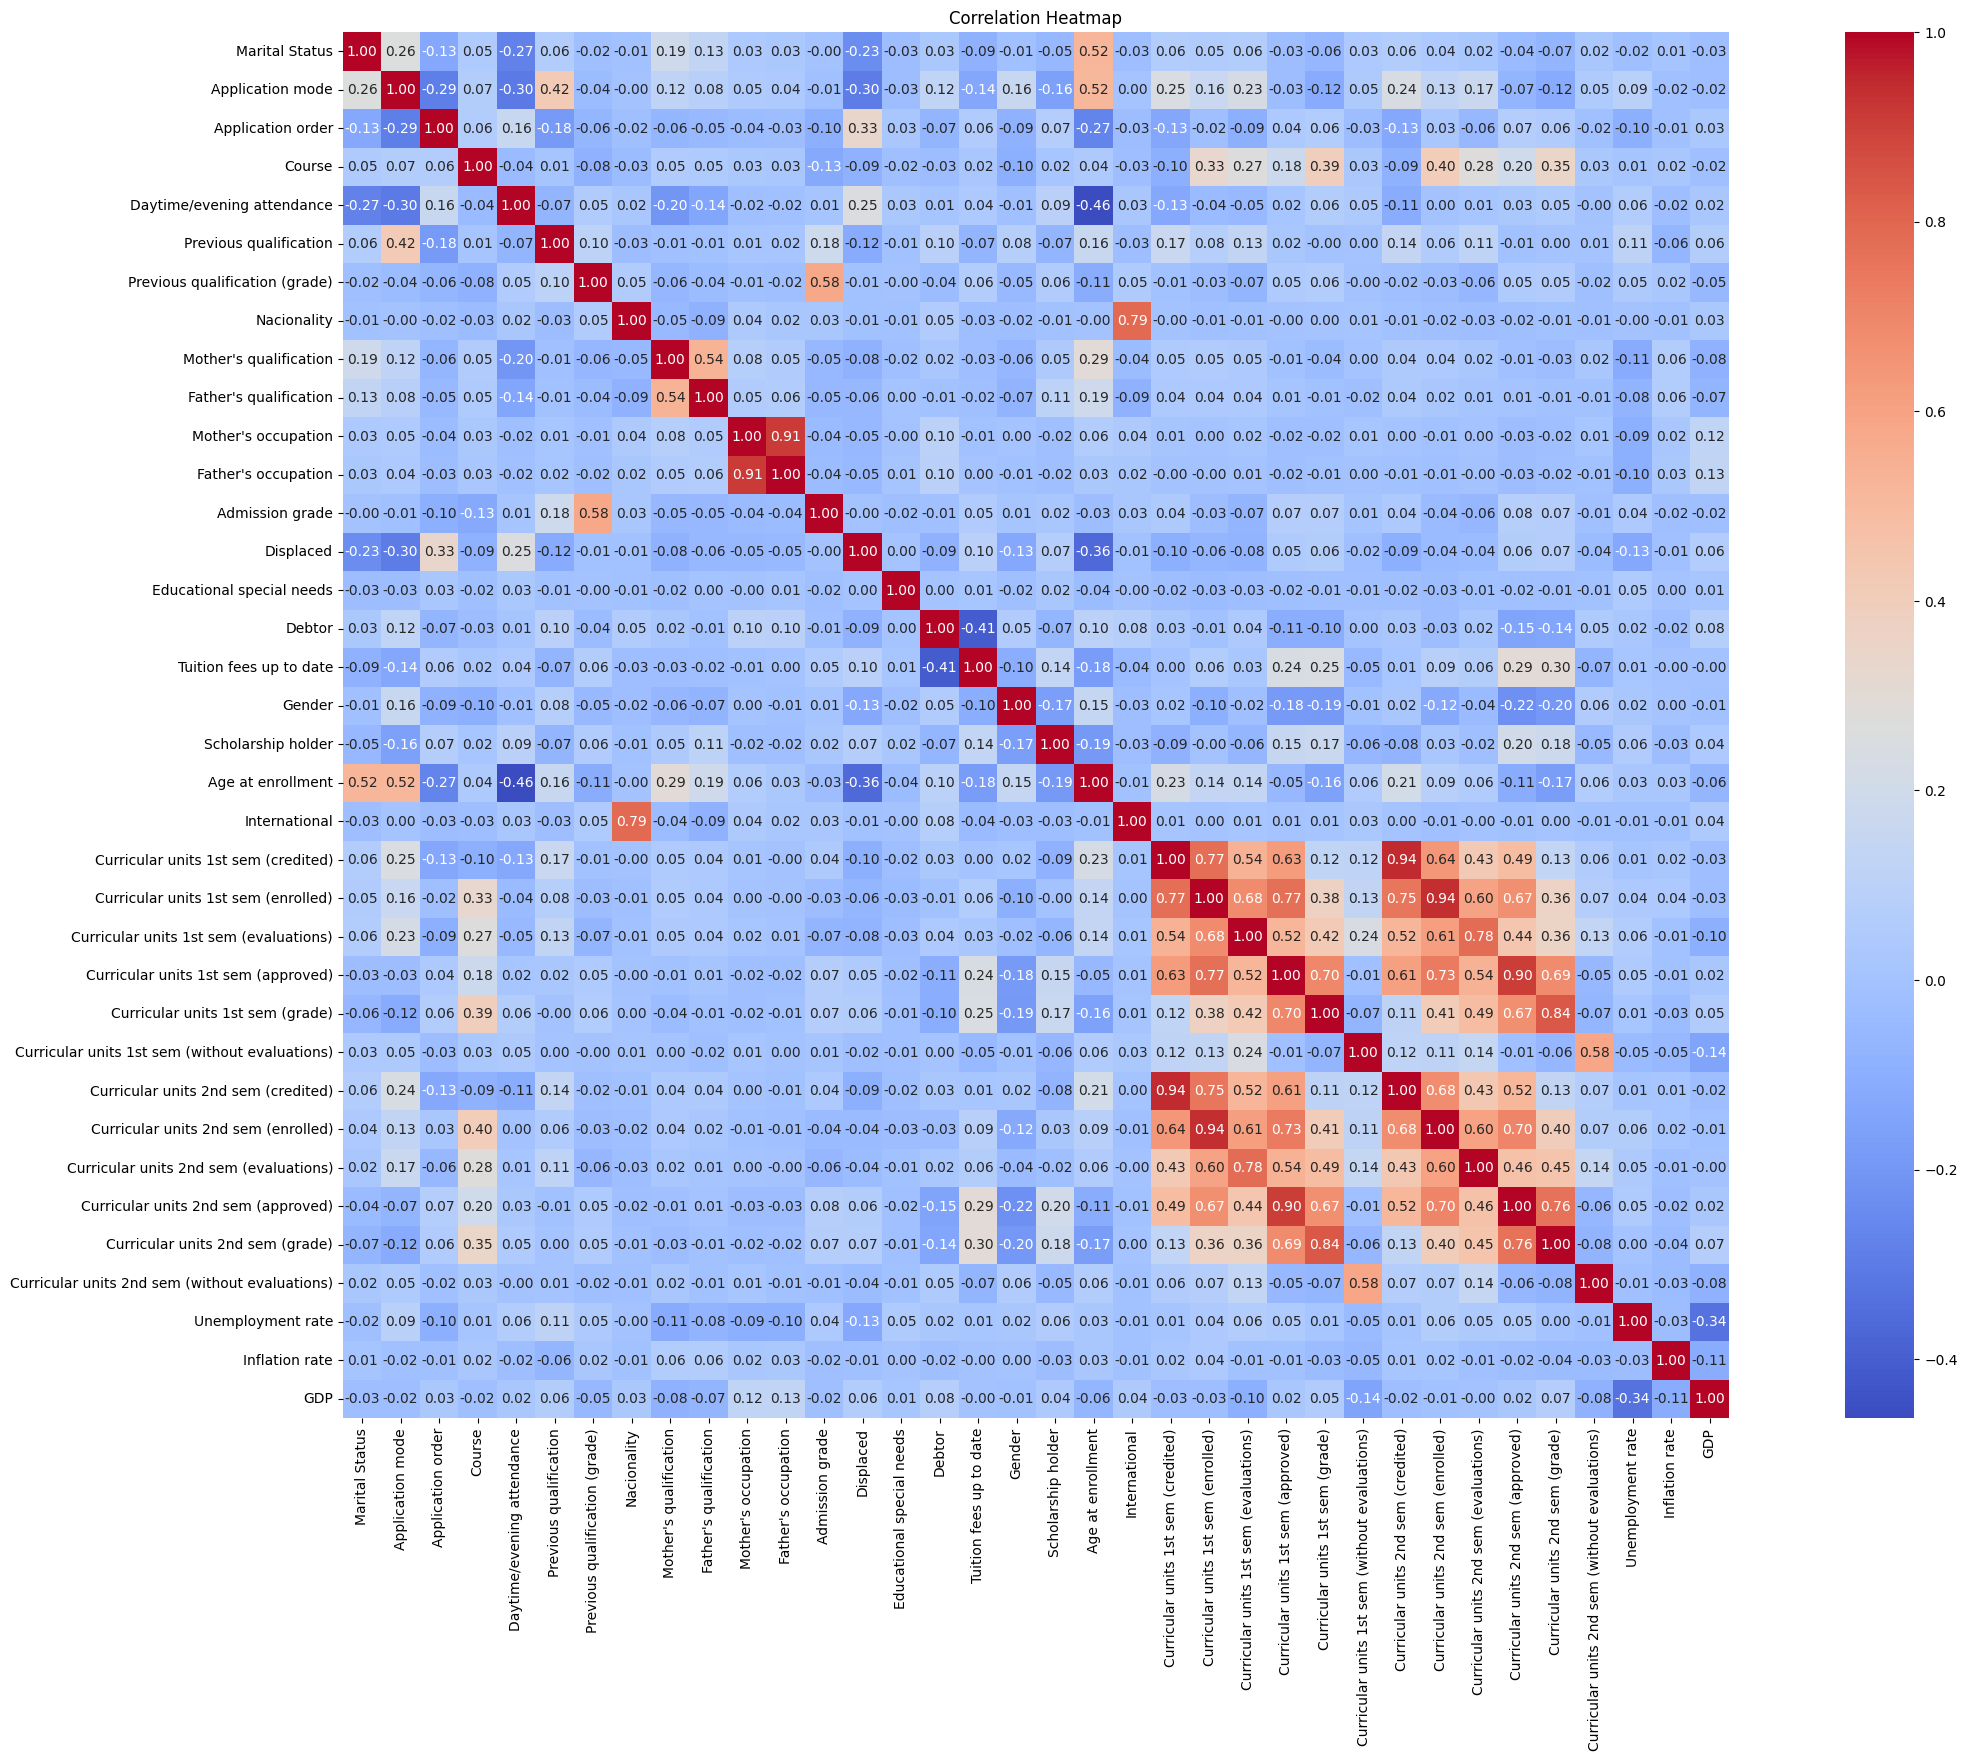

In [66]:
num_df = df.drop(columns=['Target'])
corr = num_df.corr()
plt.figure(figsize=(30, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig('wine_quality_correlation_heatmap.png', dpi = 100)

X = df.drop(columns=['Target'])
y = df['Target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
class EksetastikiNN(nn.Module):
    def __init__(self, features_number):
        super().__init__()
        self.eksetastiki = nn.Sequential(
            nn.Linear(features_number,16),
            nn.LeakyReLU(),
            nn.Linear(16,32),
            nn.LeakyReLU(),
            nn.Linear(32,64),
            nn.LeakyReLU(),
            nn.Linear(64,32),
            nn.LeakyReLU(),
            nn.Linear(32,16),
            nn.LeakyReLU(),
            nn.Linear(16,1))
    def forward(self, x):
        return self.eksetastiki(x)



In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Print complete dataset information
print("Data shapes before creating DataLoader:")
print(f"X_train: {X_train.shape} → {X_train_tensor.shape}")
print(f"X_test: {X_test.shape} → {X_test_tensor.shape}")
print(f"y_train: {y_train.shape} → {y_train_tensor.shape}")
print(f"y_test: {y_test.shape} → {y_test_tensor.shape}")

# Create dataset and dataloader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Print batch information
print("\nDataLoader information:")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Total training samples: {len(train_dataset)}")
print(f"Total test samples: {len(test_dataset)}")

# Create the model and optimization components
number_of_classes = len(y_train.unique())
model = EksetastikiNN(X_train_tensor.shape[1])
loss_function = nn.BCEWithLogitsLoss()
optimazer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize tracking lists for metrics
val_loss_mean, val_loss_accur = [], []
train_losses, train_acc = [], []

3539
5
3539
885


C:\Users\kdngi\AppData\Local\Temp\ipykernel_23048\783201805.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train=torch.tensor(X_train , dtype = torch.float32)
C:\Users\kdngi\AppData\Local\Temp\ipykernel_23048\783201805.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test=torch.tensor(X_test, dtype = torch.float32)


AssertionError: Size mismatch between tensors

Visualizations for the training 

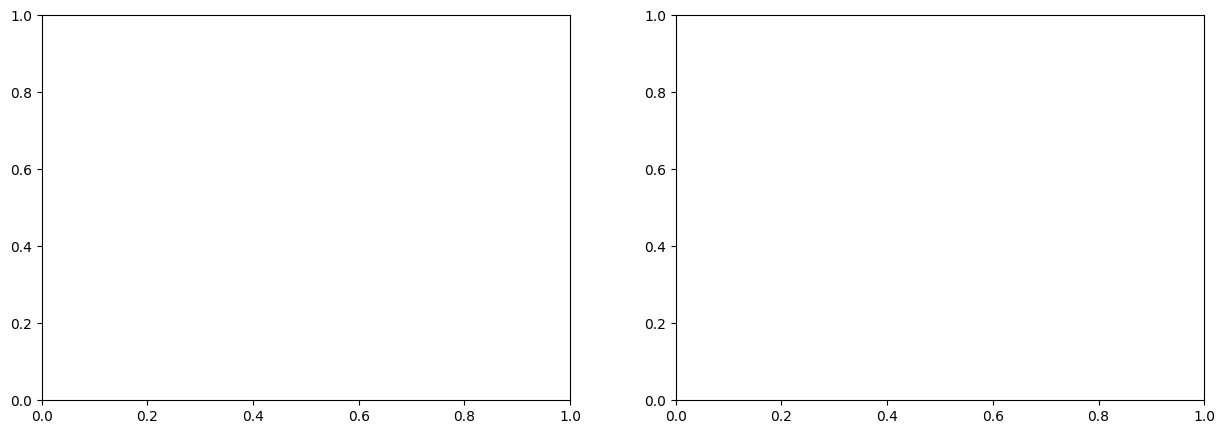

In [119]:
%matplotlib inline

# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.ion()  # Turn on interactive mode

# For storing epoch numbers
epochs = []

def update_plots(epoch):
    # Convert tensors to regular numbers for plotting
    train_losses_plot = [loss.item() for loss in train_losses]
    val_losses_plot = [loss.item() for loss in val_loss_mean]
    train_acc_plot = [acc.item() for acc in train_acc]
    val_acc_plot = [acc.item() for acc in val_loss_accur]
    
    # Find minimum length to ensure all arrays match
    min_len = min(len(train_losses_plot), len(val_losses_plot), 
                 len(train_acc_plot), len(val_acc_plot))
    
    # Use same x values for all plots based on minimum length
    x_values = list(range(1, min_len + 1))
    
    # Truncate data arrays to minimum length
    train_losses_plot = train_losses_plot[:min_len]
    val_losses_plot = val_losses_plot[:min_len]
    train_acc_plot = train_acc_plot[:min_len]
    val_acc_plot = val_acc_plot[:min_len]
    
    # Clear the previous output including plots
    clear_output(wait=True)
    
    # Create a new figure each time
    plt.figure(figsize=(15, 5))
    
    # Plot losses in subplot 1
    plt.subplot(1, 2, 1)
    plt.plot(x_values, train_losses_plot, label='Training Loss')
    plt.plot(x_values, val_losses_plot, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot accuracies in subplot 2
    plt.subplot(1, 2, 2)
    plt.plot(x_values, train_acc_plot, label='Training Accuracy')
    plt.plot(x_values, val_acc_plot, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()  # This is key - explicitly show the plot
    
    # Print current epoch stats
    print(f"Epoch {epoch}: Val Loss = {val_loss_mean[-1]:.4f}, Val Acc = {val_loss_accur[-1]:.4f}")

-----------------Training loop-------------------

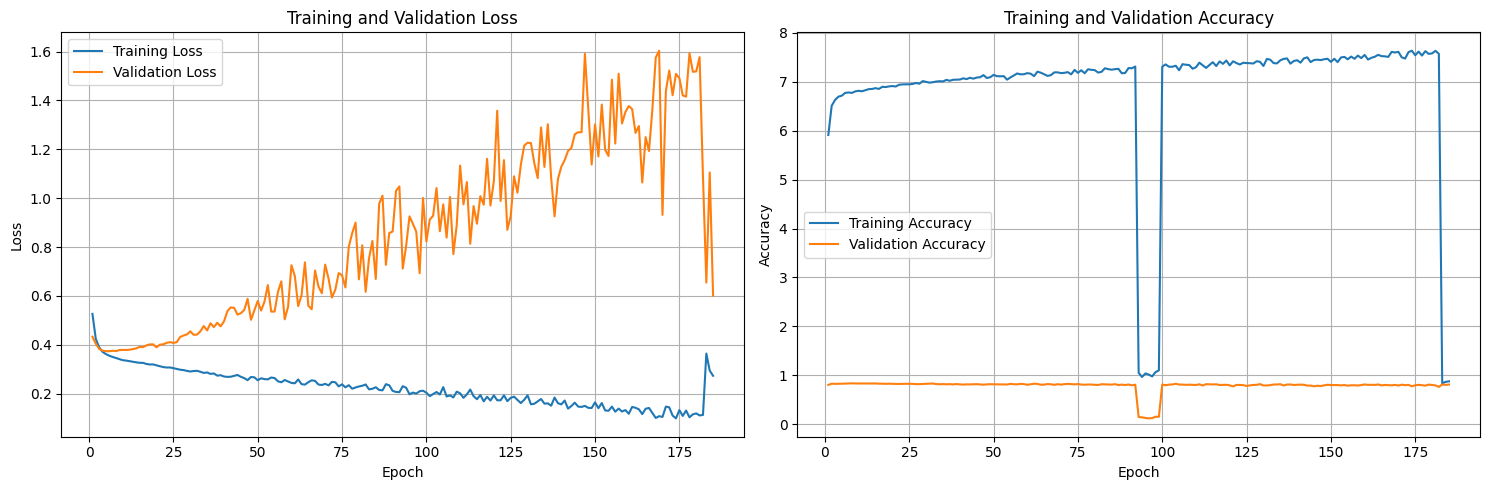

Epoch 4: Val Loss = 0.6014, Val Acc = 0.8113


KeyboardInterrupt: 

In [128]:
for epoch in range(1,100):
    model.train()
    total_loss_epoch =0
    acc_train_epoch =0 
    for xtest , ytest in train:
        out=model(xtest).squeeze()
        loss =loss_function(out, ytest.float())
        total_loss_epoch += loss
        acc_train_epoch += ((out > 0) == ytest).sum()
        optimazer.zero_grad()
        loss.backward()
        optimazer.step()
    train_losses.append(total_loss_epoch/len(train))
    train_acc.append(acc_train_epoch/len(train))
    # print(train_losses)
    # print(train_acc)

    model.eval()
    val_loss =0
    val_correct =0
    totalsamples =0
    with torch.no_grad():
        for x_test , y_test in test:
            out_val=model(x_test).squeeze()
            val_loss += loss_function(out_val,y_test.float())
            val_correct += ((out_val > 0) == y_test).sum()
            totalsamples += y_test.size(0)
    val_loss_mean.append(val_loss/len(test))
    val_loss_accur.append(val_correct /totalsamples)
    print(f"Epoch {epoch}: Val Loss = {val_loss_mean[-1]:.4f}, Val Acc = {val_loss_accur[-1]:.4f}")
    update_plots(epoch)